In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


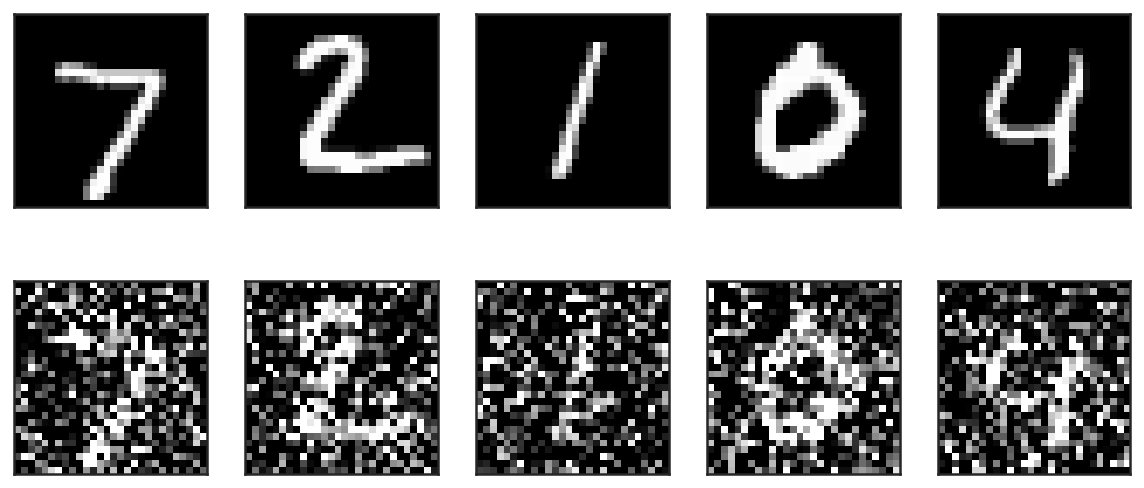

In [41]:
noise = 0.6
x_train_noisy = x_train + noise * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')

In [44]:
input_size = 784
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encode = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encode)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2200
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1485
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1397
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1354
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1324
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1301
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1281
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1272
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1262
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1252


In [58]:
images = autoencoder.predict(x_test_noisy)

In [62]:
def generate_image(images,n):
    plt.figure(figsize=(10, 10))
    for i in range(n):

        nm=random.randint(784)
        # plot noisy image 
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_noisy[nm].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == nm/2:
            ax.set_title('Data Input')

        # plot decode image 
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(images[nm].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == nm/2:
            ax.set_title('Autoencoder Output')
    

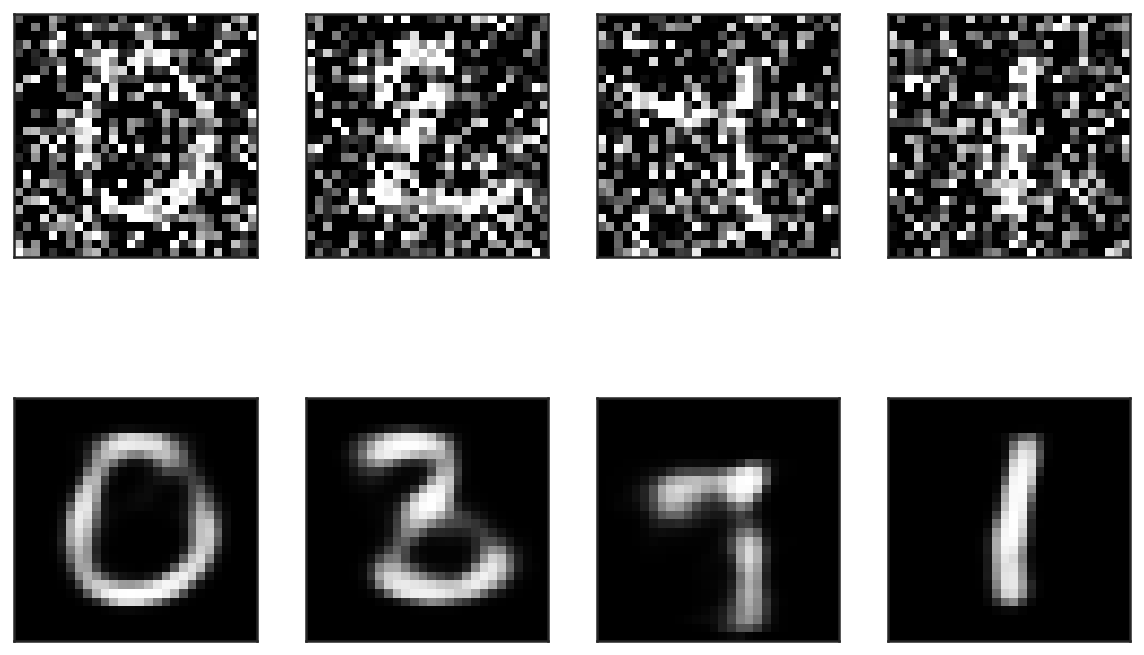

In [65]:
generate_image(images,4)

In [59]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='sigmoid')(input_img)
encode = Dense(code_size, activation='sigmoid')(hidden_1)
hidden_2 = Dense(hidden_size, activation='sigmoid')(encode)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2789
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2235
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1892
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1714
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1608
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1545
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1492
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1449
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1414
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1388


In [60]:
images = autoencoder.predict(x_test_noisy)

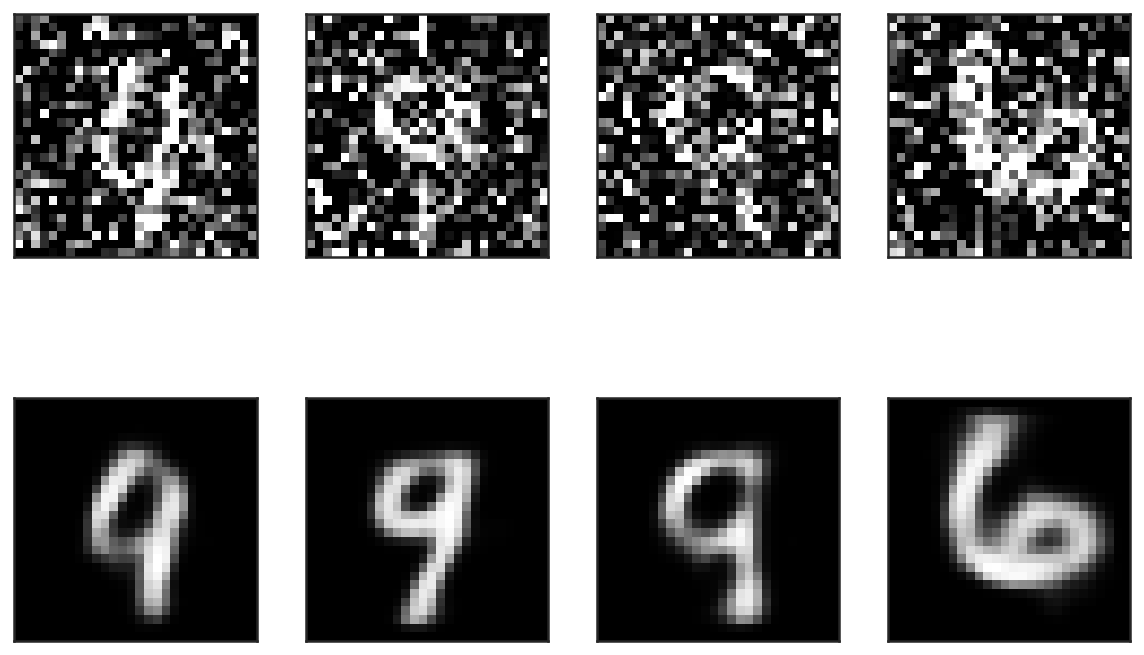

In [63]:
generate_image(images,4)